In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 80.6k/80.6k [00:00<00:00, 52.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1


In [4]:
import pandas as pd
import os

# Construct the full path to the CSV file
file_path = os.path.join(path, 'loan_approval_dataset.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
display(df.head())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder_loan_status = LabelEncoder()

# Apply label encoding to the ' loan_status' column in the original DataFrame
df[' loan_status_encoded'] = label_encoder_loan_status.fit_transform(df[' loan_status'])

# Display the first few rows with the new encoded column and the mapping
display(df[[' loan_status']].head())
display(list(label_encoder_loan_status.classes_))

,loan_status
0,0
1,1
2,1
3,1
4,1


[np.int64(0), np.int64(1)]

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder (assuming it's not already initialized or you want a new one for this column)
label_encoder_education = LabelEncoder()

# Apply label encoding to the ' education' column
df[' education'] = label_encoder_education.fit_transform(df[' education'])
# Apply label encoding to the ' self_employed' column
df[' self_employed'] = label_encoder_education.fit_transform(df[' self_employed'])
# Display the first few rows with the new encoded column and the mapping
display(df[[' education']].head())
display(list(label_encoder_education.classes_))

,education
0,0
1,1
2,0
3,0
4,1


[' No', ' Yes']

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Ensure ' self_employed' is label encoded
# Check if ' self_employed_encoded' already exists to avoid re-encoding
if ' self_employed_encoded' not in df.columns:
    label_encoder_self_employed = LabelEncoder()
    df[' self_employed_encoded'] = label_encoder_self_employed.fit_transform(df[' self_employed'])
    print("Label encoding applied to ' self_employed'.")
else:
    print("' self_employed' column already encoded.")


# Separate features (X) and target (y)
# Exclude original categorical columns and the original loan_status column
X = df.drop([' education', ' self_employed', ' loan_status'], axis=1)
y = df[' loan_status_encoded'] # Use the encoded target variable

# Identify numerical columns (these are now all columns in X except the encoded ones)
# In this case, all columns in X should be numerical after dropping the original categoricals
numerical_cols = X.columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standard scaling to all numerical features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame (optional, but good for readability)
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols, index=X.index)

# Display the first few rows of the scaled features
display(X_scaled.head())

Label encoding applied to ' self_employed'.


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_encoded,self_employed_encoded
0,-1.731645,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,-0.779297,-1.007288
1,-1.730834,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1.283207,0.992765
2,-1.730022,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1.283207,-1.007288
3,-1.729211,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1.283207,-1.007288
4,-1.728399,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1.283207,0.992765


In [37]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Apply RandomOverSampler to the scaled features and encoded target variable
ros = RandomOverSampler(random_state=42)
X_resampled_scaled, y_resampled = ros.fit_resample(X_scaled, y)

# Display the new distribution of the target variable
display(y_resampled.value_counts())

# Display the first few rows of the resampled and scaled features
display(X_resampled_scaled.head())

,count
loan_status_encoded,
0,2656
1,2656


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_encoded,self_employed_encoded
0,-1.731645,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,-0.779297,-1.007288
1,-1.730834,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1.283207,0.992765
2,-1.730022,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1.283207,-1.007288
3,-1.729211,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1.283207,-1.007288
4,-1.728399,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1.283207,0.992765


In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3984, 12)
Shape of X_test: (1328, 12)
Shape of y_train: (3984,)
Shape of y_test: (1328,)


In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


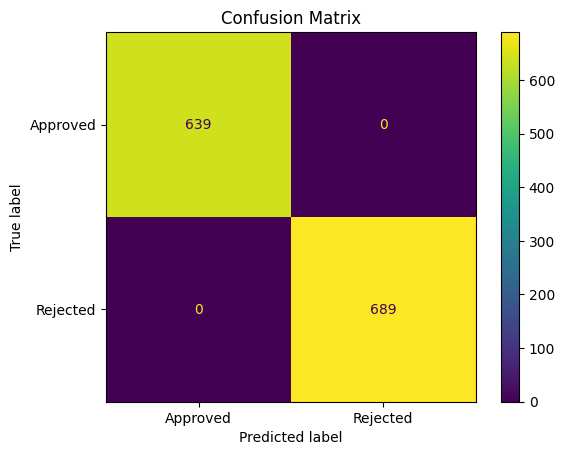

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Approved', 'Rejected'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Decision Tree model trained successfully!

--- Decision Tree Model Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


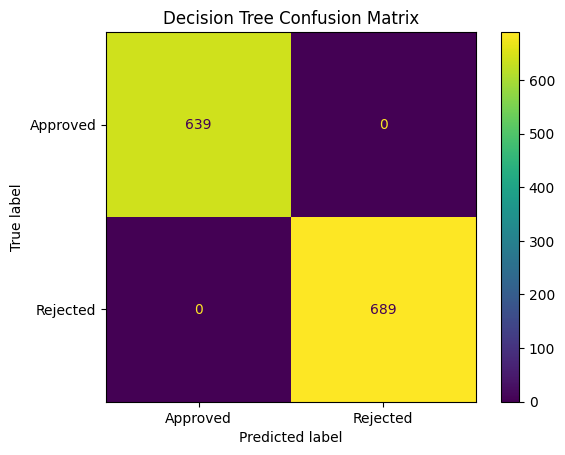


--- Logistic Regression Model Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


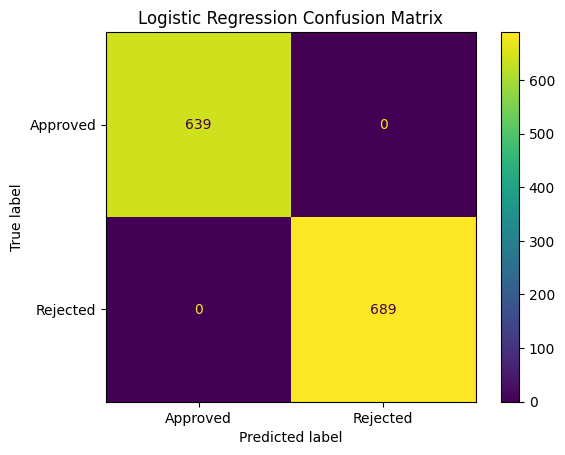


--- Model Comparison ---
Decision Tree Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

# Predict the labels on the test set using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\n--- Decision Tree Model Evaluation ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

# Display the confusion matrix for the Decision Tree model
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Approved', 'Rejected'])
disp_dt.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Evaluate the Logistic Regression model (from previous step)
y_pred_lr = model.predict(X_test) # Using the 'model' variable from the previous Logistic Regression training

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

# Display the confusion matrix for the Logistic Regression model
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Approved', 'Rejected'])
disp_lr.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Simple comparison
print("\n--- Model Comparison ---")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")